In [1]:
print("hello")


hello


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("C:\\Users\\Wahid\\Downloads\\dirty_cafe_sales.csv")
print(df)

     Transaction ID      Item Quantity Price Per Unit Total Spent  \
0       TXN_1961373    Coffee        2            2.0         4.0   
1       TXN_4977031      Cake        4            3.0        12.0   
2       TXN_4271903    Cookie        4            1.0       ERROR   
3       TXN_7034554     Salad        2            5.0        10.0   
4       TXN_3160411    Coffee        2            2.0         4.0   
...             ...       ...      ...            ...         ...   
9995    TXN_7672686    Coffee        2            2.0         4.0   
9996    TXN_9659401       NaN        3            NaN         3.0   
9997    TXN_5255387    Coffee        4            2.0         8.0   
9998    TXN_7695629    Cookie        3            NaN         3.0   
9999    TXN_6170729  Sandwich        3            4.0        12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       2023-05-16  
2        Credit Card 

In [9]:
df.shape

(10000, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [11]:
df.head(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [12]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [14]:
print(df.isnull().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [15]:
missing_per_row = df.isnull().sum(axis=1)
print(missing_per_row)


0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    3
9997    1
9998    2
9999    0
Length: 10000, dtype: int64


In [19]:
df_cleaned = df[missing_per_row <= 3]
df = df[missing_per_row <= 3].reset_index(drop=True)
print("Cleaned rows:", df_cleaned.shape[0])

Cleaned rows: 9996


In [20]:
print(df.isnull().sum())

Transaction ID         0
Item                 332
Quantity             138
Price Per Unit       177
Total Spent          172
Payment Method      2575
Location            3261
Transaction Date     155
dtype: int64


In [58]:
target_cols = ['Item', 'Location', 'Payment Method']

for col in target_cols:
    df[col] = df[col].replace(['Unknown', 'UNKNOWN', 'Error', 'ERROR'], np.nan)
    print(df)

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    COFFEE       2.0        2.000000      4.00000   
1       TXN_4977031      CAKE       4.0        3.000000     12.00000   
2       TXN_4271903    COOKIE       4.0        1.000000      8.92575   
3       TXN_7034554     SALAD       2.0        5.000000     10.00000   
4       TXN_3160411    COFFEE       2.0        2.000000      4.00000   
...             ...       ...       ...             ...          ...   
9991    TXN_7672686    COFFEE       2.0        2.000000      4.00000   
9992    TXN_9659401     JUICE       3.0        2.949974      3.00000   
9993    TXN_5255387    COFFEE       4.0        2.000000      8.00000   
9994    TXN_7695629    COOKIE       3.0        2.949974      3.00000   
9995    TXN_6170729  SANDWICH       3.0        4.000000     12.00000   

      Payment Method  Location Transaction Date  
0        CREDIT CARD  TAKEAWAY       2023-09-08  
1               CASH  IN-STORE     

In [61]:
print(df[['Item', 'Location', 'Payment Method']].head(20))

        Item  Location  Payment Method
0     COFFEE  TAKEAWAY     CREDIT CARD
1       CAKE  IN-STORE            CASH
2     COOKIE  IN-STORE     CREDIT CARD
3      SALAD       NaN             NaN
4     COFFEE  IN-STORE  DIGITAL WALLET
5   SMOOTHIE  TAKEAWAY     CREDIT CARD
6        NaN  TAKEAWAY             NaN
7   SANDWICH       NaN            CASH
8      JUICE  TAKEAWAY  DIGITAL WALLET
9   SANDWICH  IN-STORE  DIGITAL WALLET
10     SALAD  TAKEAWAY            CASH
11  SANDWICH  TAKEAWAY     CREDIT CARD
12  SANDWICH  IN-STORE            CASH
13    COOKIE  TAKEAWAY  DIGITAL WALLET
14       NaN  IN-STORE  DIGITAL WALLET
15     SALAD  IN-STORE     CREDIT CARD
16  SANDWICH  TAKEAWAY  DIGITAL WALLET
17     JUICE  IN-STORE            CASH
18      CAKE       NaN            CASH
19     JUICE  TAKEAWAY            CASH


In [62]:
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])
print(df)

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    COFFEE       2.0        2.000000      4.00000   
1       TXN_4977031      CAKE       4.0        3.000000     12.00000   
2       TXN_4271903    COOKIE       4.0        1.000000      8.92575   
3       TXN_7034554     SALAD       2.0        5.000000     10.00000   
4       TXN_3160411    COFFEE       2.0        2.000000      4.00000   
...             ...       ...       ...             ...          ...   
9991    TXN_7672686    COFFEE       2.0        2.000000      4.00000   
9992    TXN_9659401     JUICE       3.0        2.949974      3.00000   
9993    TXN_5255387    COFFEE       4.0        2.000000      8.00000   
9994    TXN_7695629    COOKIE       3.0        2.949974      3.00000   
9995    TXN_6170729  SANDWICH       3.0        4.000000     12.00000   

      Payment Method  Location Transaction Date  
0        CREDIT CARD  TAKEAWAY       2023-09-08  
1               CASH  IN-STORE     

In [63]:
print(df[['Item', 'Location', 'Payment Method']].head(20))

        Item  Location  Payment Method
0     COFFEE  TAKEAWAY     CREDIT CARD
1       CAKE  IN-STORE            CASH
2     COOKIE  IN-STORE     CREDIT CARD
3      SALAD  TAKEAWAY  DIGITAL WALLET
4     COFFEE  IN-STORE  DIGITAL WALLET
5   SMOOTHIE  TAKEAWAY     CREDIT CARD
6      JUICE  TAKEAWAY  DIGITAL WALLET
7   SANDWICH  TAKEAWAY            CASH
8      JUICE  TAKEAWAY  DIGITAL WALLET
9   SANDWICH  IN-STORE  DIGITAL WALLET
10     SALAD  TAKEAWAY            CASH
11  SANDWICH  TAKEAWAY     CREDIT CARD
12  SANDWICH  IN-STORE            CASH
13    COOKIE  TAKEAWAY  DIGITAL WALLET
14     JUICE  IN-STORE  DIGITAL WALLET
15     SALAD  IN-STORE     CREDIT CARD
16  SANDWICH  TAKEAWAY  DIGITAL WALLET
17     JUICE  IN-STORE            CASH
18      CAKE  TAKEAWAY            CASH
19     JUICE  TAKEAWAY            CASH


In [24]:
print(df.isnull().sum())   # 3 column problem solved 


Transaction ID        0
Item                  0
Quantity            138
Price Per Unit      177
Total Spent         172
Payment Method        0
Location              0
Transaction Date    155
dtype: int64


In [27]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].mean())
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].mean())
print(df)

TypeError: can only concatenate str (not "int") to str

In [28]:
print(df.dtypes)

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object


In [30]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
print(df)

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee       2.0             2.0          4.0   
1       TXN_4977031      Cake       4.0             3.0         12.0   
2       TXN_4271903    Cookie       4.0             1.0          NaN   
3       TXN_7034554     Salad       2.0             5.0         10.0   
4       TXN_3160411    Coffee       2.0             2.0          4.0   
...             ...       ...       ...             ...          ...   
9991    TXN_7672686    Coffee       2.0             2.0          4.0   
9992    TXN_9659401   Unknown       3.0             NaN          3.0   
9993    TXN_5255387    Coffee       4.0             2.0          8.0   
9994    TXN_7695629    Cookie       3.0             NaN          3.0   
9995    TXN_6170729  Sandwich       3.0             4.0         12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store     

In [31]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].mean())
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].mean())
print(df)

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee       2.0        2.000000      4.00000   
1       TXN_4977031      Cake       4.0        3.000000     12.00000   
2       TXN_4271903    Cookie       4.0        1.000000      8.92575   
3       TXN_7034554     Salad       2.0        5.000000     10.00000   
4       TXN_3160411    Coffee       2.0        2.000000      4.00000   
...             ...       ...       ...             ...          ...   
9991    TXN_7672686    Coffee       2.0        2.000000      4.00000   
9992    TXN_9659401   Unknown       3.0        2.949974      3.00000   
9993    TXN_5255387    Coffee       4.0        2.000000      8.00000   
9994    TXN_7695629    Cookie       3.0        2.949974      3.00000   
9995    TXN_6170729  Sandwich       3.0        4.000000     12.00000   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store     

In [64]:
print(df[['Quantity','Price Per Unit','Total Spent']].head(20))

    Quantity  Price Per Unit  Total Spent
0        2.0             2.0      4.00000
1        4.0             3.0     12.00000
2        4.0             1.0      8.92575
3        2.0             5.0     10.00000
4        2.0             2.0      4.00000
5        5.0             4.0     20.00000
6        3.0             3.0      9.00000
7        4.0             4.0     16.00000
8        5.0             3.0     15.00000
9        5.0             4.0     20.00000
10       5.0             5.0     25.00000
11       2.0             4.0      8.00000
12       2.0             4.0      8.00000
13       5.0             1.0      5.00000
14       2.0             1.5      3.00000
15       3.0             5.0     15.00000
16       1.0             4.0      4.00000
17       2.0             3.0      6.00000
18       5.0             3.0     15.00000
19       4.0             3.0     12.00000


In [32]:
print(df.isnull().sum())

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    155
dtype: int64


In [33]:
df['Transaction Date'] = df['Transaction Date'].fillna(method='ffill')


C:\Users\Wahid\AppData\Local\Temp\ipykernel_11492\3683594078.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Transaction Date'] = df['Transaction Date'].fillna(method='ffill')


In [65]:
print(df['Transaction Date'].head(40)) 


0    2023-09-08
1    2023-05-16
2    2023-07-19
3    2023-04-27
4    2023-06-11
5    2023-03-31
6    2023-10-06
7    2023-10-28
8    2023-07-28
9    2023-12-31
10   2023-11-07
11   2023-11-07
12   2023-05-03
13   2023-06-01
14   2023-03-21
15   2023-11-15
16   2023-06-10
17   2023-02-24
18   2023-03-25
19   2023-01-15
20   2023-04-04
21   2023-03-30
22   2023-12-01
23   2023-09-18
24   2023-06-03
25   2023-12-13
26   2023-04-20
27   2023-04-10
28   2023-03-11
29   2023-03-11
30   2023-06-02
31   2023-11-06
32   2023-08-15
33   2023-08-15
34   2023-10-09
35   2023-05-28
36   2023-07-17
37   2023-04-29
38   2023-06-08
39   2023-06-29
Name: Transaction Date, dtype: datetime64[ns]


In [66]:
df['Transaction Date'] = df['Transaction Date'].replace("ERROR", pd.NA)
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Transaction Date'] = df['Transaction Date'].ffill()
print(df)

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    COFFEE       2.0        2.000000      4.00000   
1       TXN_4977031      CAKE       4.0        3.000000     12.00000   
2       TXN_4271903    COOKIE       4.0        1.000000      8.92575   
3       TXN_7034554     SALAD       2.0        5.000000     10.00000   
4       TXN_3160411    COFFEE       2.0        2.000000      4.00000   
...             ...       ...       ...             ...          ...   
9991    TXN_7672686    COFFEE       2.0        2.000000      4.00000   
9992    TXN_9659401     JUICE       3.0        2.949974      3.00000   
9993    TXN_5255387    COFFEE       4.0        2.000000      8.00000   
9994    TXN_7695629    COOKIE       3.0        2.949974      3.00000   
9995    TXN_6170729  SANDWICH       3.0        4.000000     12.00000   

      Payment Method  Location Transaction Date  
0        CREDIT CARD  TAKEAWAY       2023-09-08  
1               CASH  IN-STORE     

In [67]:
print(df['Transaction Date'].head(40)) 

0    2023-09-08
1    2023-05-16
2    2023-07-19
3    2023-04-27
4    2023-06-11
5    2023-03-31
6    2023-10-06
7    2023-10-28
8    2023-07-28
9    2023-12-31
10   2023-11-07
11   2023-11-07
12   2023-05-03
13   2023-06-01
14   2023-03-21
15   2023-11-15
16   2023-06-10
17   2023-02-24
18   2023-03-25
19   2023-01-15
20   2023-04-04
21   2023-03-30
22   2023-12-01
23   2023-09-18
24   2023-06-03
25   2023-12-13
26   2023-04-20
27   2023-04-10
28   2023-03-11
29   2023-03-11
30   2023-06-02
31   2023-11-06
32   2023-08-15
33   2023-08-15
34   2023-10-09
35   2023-05-28
36   2023-07-17
37   2023-04-29
38   2023-06-08
39   2023-06-29
Name: Transaction Date, dtype: datetime64[ns]


In [2]:
print(df.isnull().sum())

NameError: name 'df' is not defined

In [68]:
df.head(20)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,COFFEE,2.0,2.0,4.00000,CREDIT CARD,TAKEAWAY,2023-09-08
1,TXN_4977031,CAKE,4.0,3.0,12.00000,CASH,IN-STORE,2023-05-16
2,TXN_4271903,COOKIE,4.0,1.0,8.92575,CREDIT CARD,IN-STORE,2023-07-19
3,TXN_7034554,SALAD,2.0,5.0,10.00000,DIGITAL WALLET,TAKEAWAY,2023-04-27
4,TXN_3160411,COFFEE,2.0,2.0,4.00000,DIGITAL WALLET,IN-STORE,2023-06-11
5,TXN_2602893,SMOOTHIE,5.0,4.0,20.00000,CREDIT CARD,TAKEAWAY,2023-03-31
6,TXN_4433211,JUICE,3.0,3.0,9.00000,DIGITAL WALLET,TAKEAWAY,2023-10-06
7,TXN_6699534,SANDWICH,4.0,4.0,16.00000,CASH,TAKEAWAY,2023-10-28
8,TXN_4717867,JUICE,5.0,3.0,15.00000,DIGITAL WALLET,TAKEAWAY,2023-07-28
9,TXN_2064365,SANDWICH,5.0,4.0,20.00000,DIGITAL WALLET,IN-STORE,2023-12-31


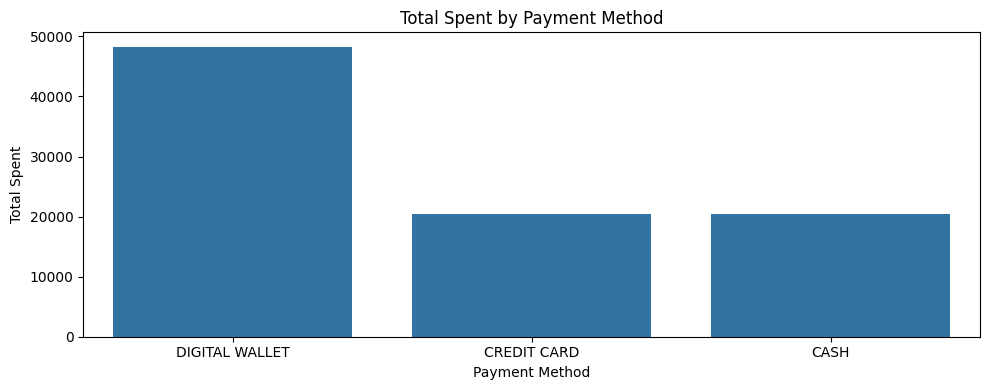

In [106]:
import seaborn as sns
payment_data = df.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=payment_data.index, y=payment_data.values)

plt.title('Total Spent by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Spent')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

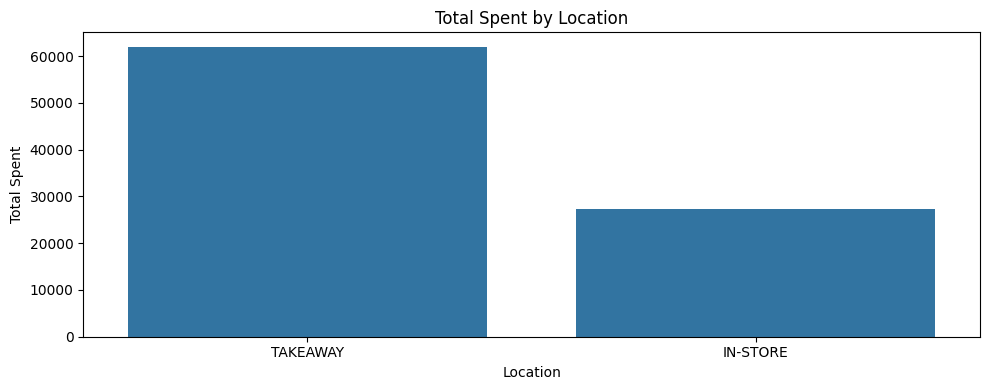

In [107]:
location_spending = df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=location_spending.index, y=location_spending.values)

plt.title('Total Spent by Location')
plt.xlabel('Location')
plt.ylabel('Total Spent')
plt.xticks(rotation=0)  # Location names straight hon
plt.tight_layout()
plt.show()

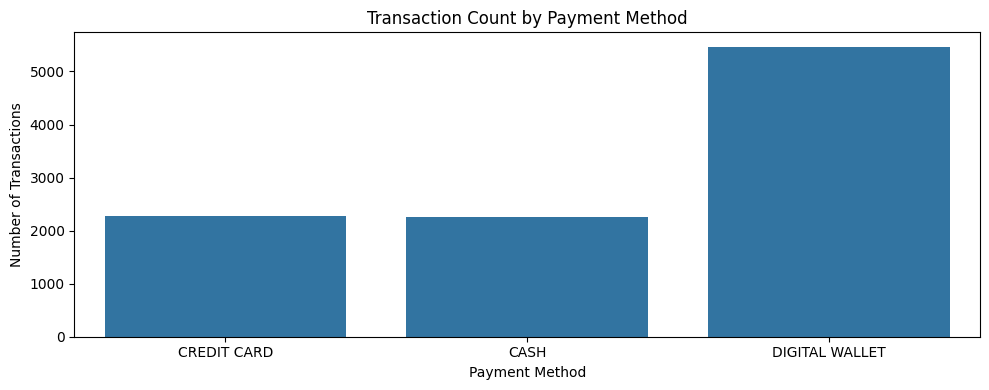

In [108]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Payment Method')

plt.title('Transaction Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)  # Words straight
plt.tight_layout()
plt.show()

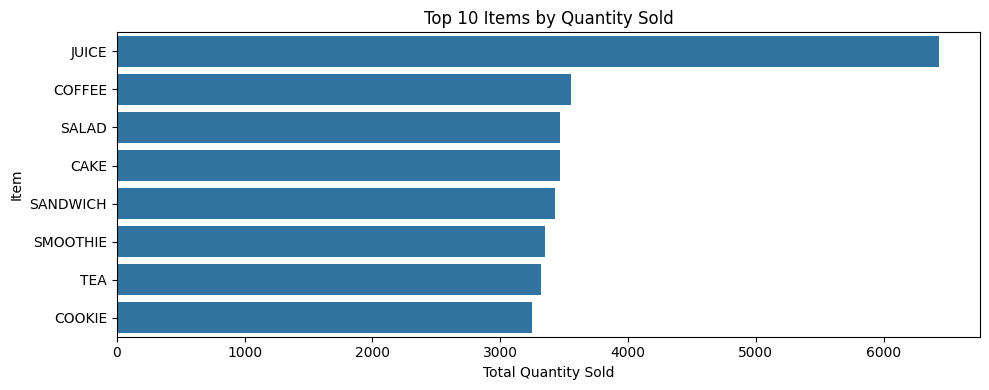

In [109]:
top_items = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_items.values, y=top_items.index)

plt.title('Top 10 Items by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

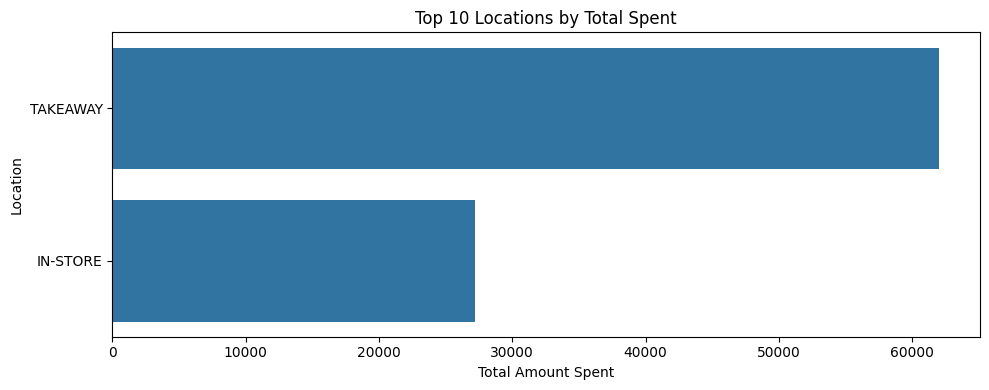

In [110]:
top_locations = df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_locations.values, y=top_locations.index)

plt.title('Top 10 Locations by Total Spent')
plt.xlabel('Total Amount Spent')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

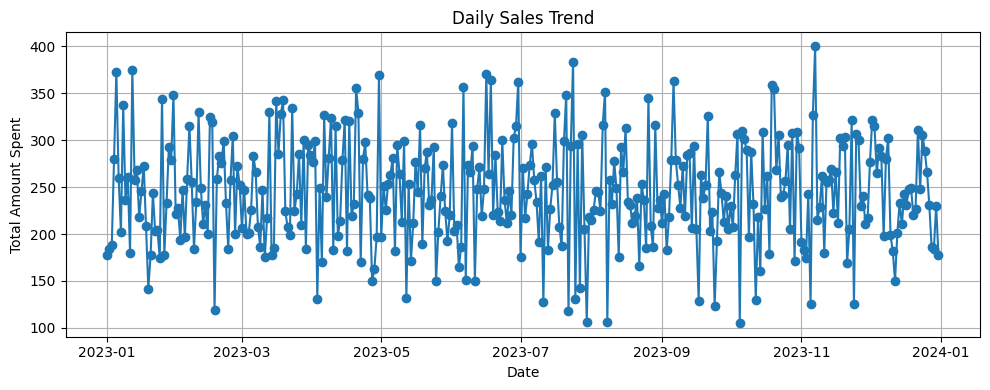

In [111]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

daily_sales = df.groupby('Transaction Date')['Total Spent'].sum()

plt.figure(figsize=(10, 4))
plt.plot(daily_sales.index, daily_sales.values, marker='o')

plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount Spent')
plt.grid(True)
plt.tight_layout()
plt.show()

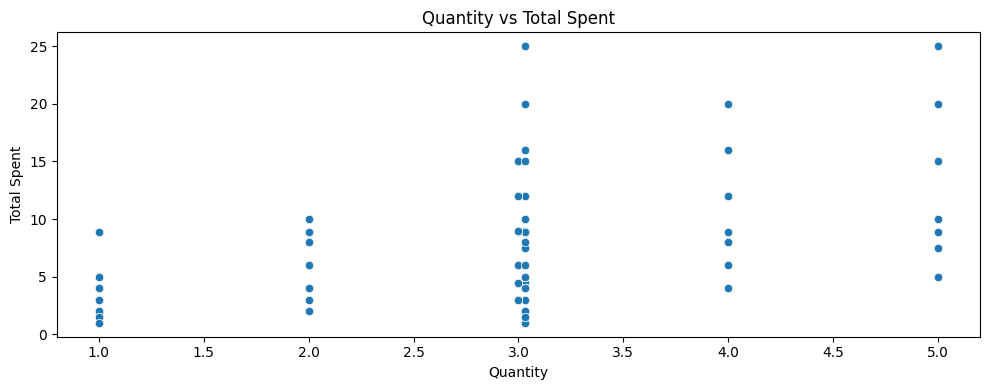

In [112]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='Quantity', y='Total Spent')

plt.title('Quantity vs Total Spent')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.tight_layout()
plt.show()

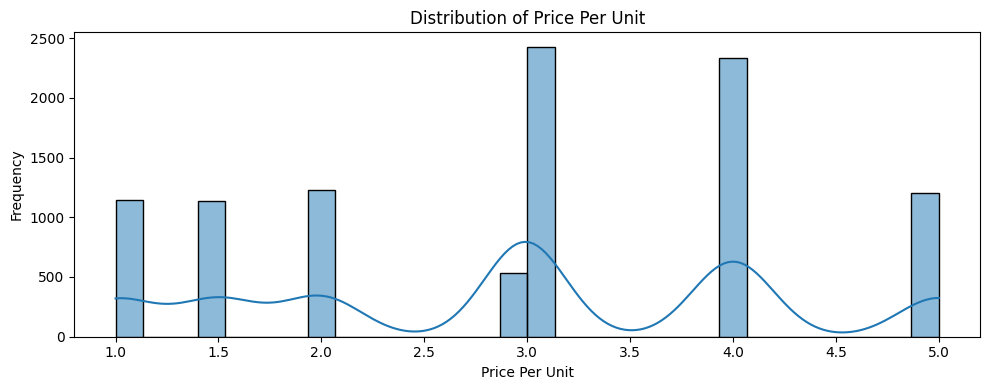

In [113]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Price Per Unit'], bins=30, kde=True)

plt.title('Distribution of Price Per Unit')
plt.xlabel('Price Per Unit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

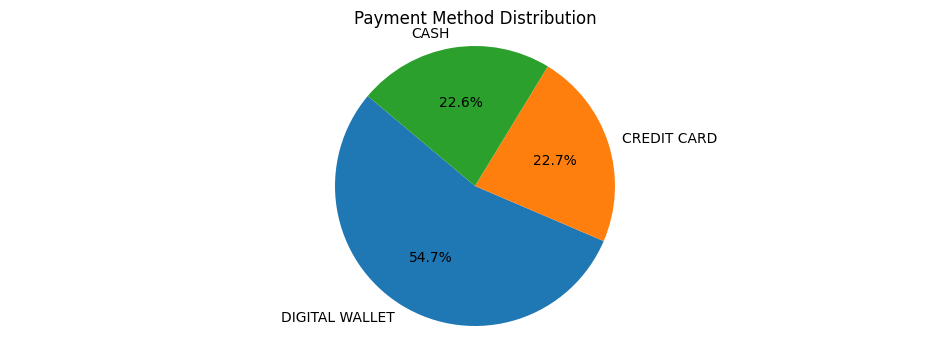

In [115]:
payment_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(12, 4))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

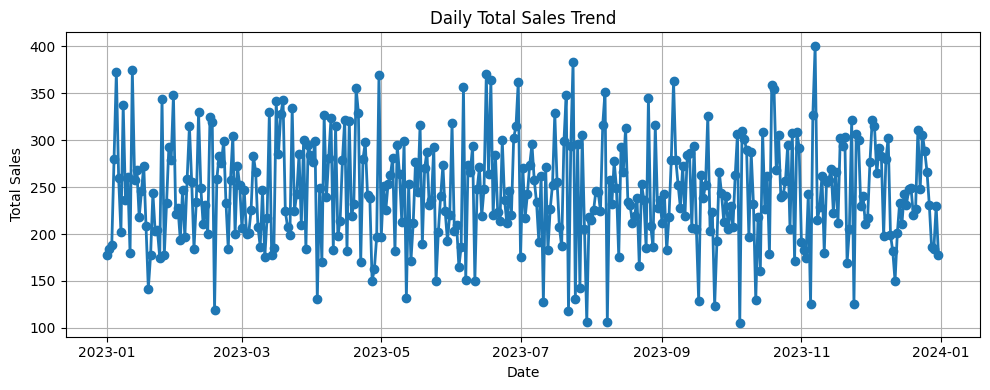

In [116]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
daily_sales = df.groupby('Transaction Date')['Total Spent'].sum()

plt.figure(figsize=(10, 4))
plt.plot(daily_sales.index, daily_sales.values, linewidth=2,marker='o')
plt.title('Daily Total Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

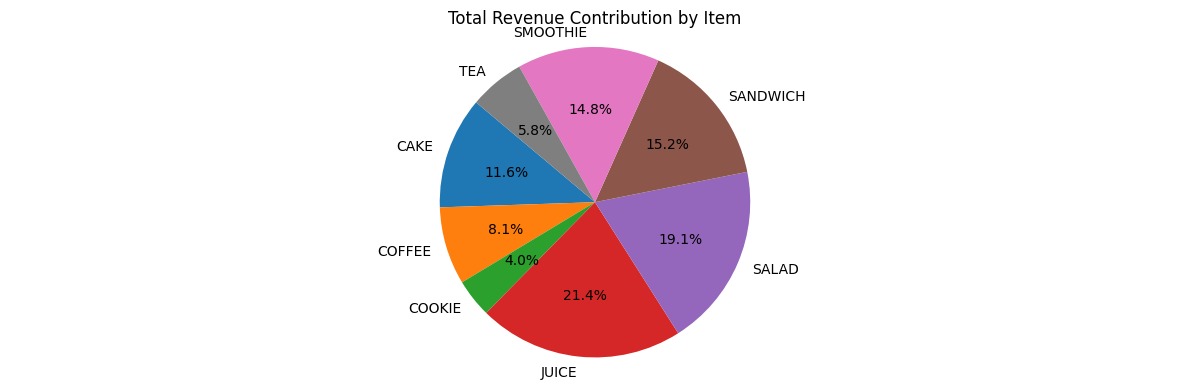

In [117]:
item_revenue = df.groupby('Item')['Total Spent'].sum()

# Plot pie chart
plt.figure(figsize=(12, 4))
plt.pie(item_revenue, labels=item_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue Contribution by Item')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.tight_layout()
plt.show()

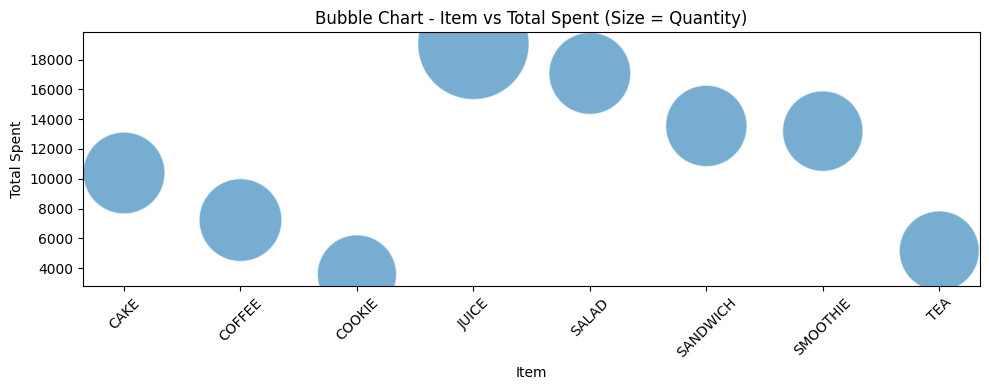

In [118]:
item_data = df.groupby("Item").agg({
    "Total Spent": "sum",
    "Quantity": "sum"
}).reset_index()

plt.figure(figsize=(10, 4))
plt.scatter(item_data["Item"], 
            item_data["Total Spent"], 
            s=item_data["Quantity"]*1, 
            alpha=0.6, 
            edgecolors="w")

plt.title("Bubble Chart - Item vs Total Spent (Size = Quantity)")
plt.xlabel("Item")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined